In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.impute import *

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
svm = SVR()

In [4]:
data= pd.read_csv('/content/Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
data.shape

(545, 13)

In [6]:
data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [7]:
y=data['price']
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [8]:
y.value_counts()

,count
price,
3500000,17
4200000,17
4900000,12
3150000,9
5600000,9
...,...
6580000,1
4319000,1
4375000,1


In [9]:
x= data.drop(['price'],axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
col_names= list(data.columns)
col_names

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [11]:
# Check for missing entries
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [12]:
x['guestroom'].value_counts()
x['guestroom'] = x['guestroom'].map( {'yes': 1, 'no': 0} ).astype(int)

In [13]:
x['mainroad'].value_counts()
x['mainroad'] = x['mainroad'].map( {'yes': 1, 'no': 0} ).astype(int)

In [14]:
x['basement'].value_counts()
x['basement'] = x['basement'].map( {'yes': 1, 'no': 0} ).astype(int)

In [15]:
x['airconditioning'].value_counts()
x['airconditioning'] = x['airconditioning'].map( {'yes': 1, 'no': 0} ).astype(int)

In [16]:
x['hotwaterheating'].value_counts()
x['hotwaterheating'] = x['hotwaterheating'].map( {'yes': 1, 'no': 0} ).astype(int)

In [17]:
x['prefarea'].value_counts()
x['prefarea'] = x['prefarea'].map( {'yes': 1, 'no': 0} ).astype(int)

In [18]:
x['furnishingstatus'] = x['furnishingstatus'].map( {'semi-furnished': 1, 'unfurnished': 0, 'furnished':2} )

In [19]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


<Axes: >

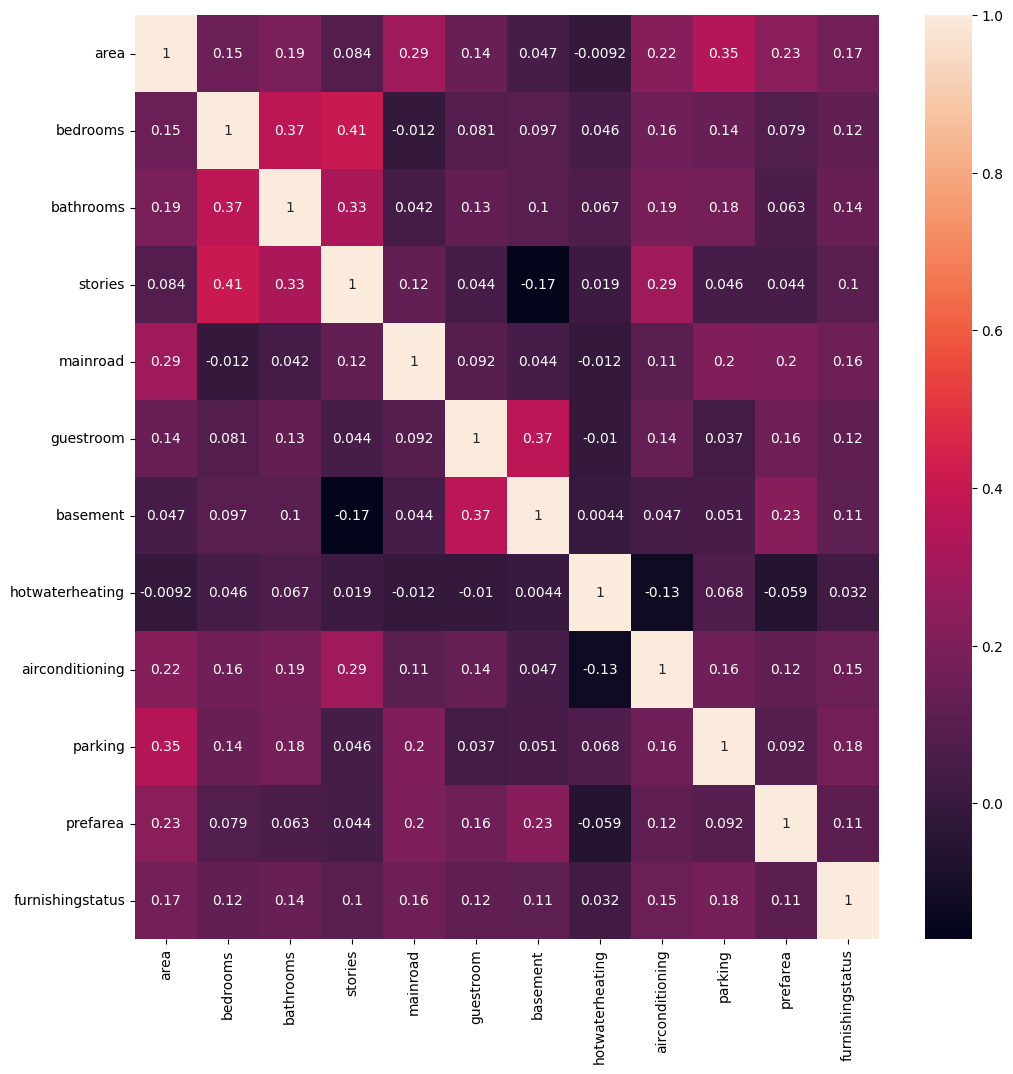

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(x.corr(), annot=True)

The target variable, price, is a continuous numerical value (e.g., 13300000, 7140000, etc.), and the goal is to predict house prices based on features like area, bedrooms, bathrooms, etc. this is a regression problem.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)
# We usually use 80:20 split ratio.
# Use random state to reproduce same split.

In [22]:
column_names= x.columns.values
column_names

array(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

In [23]:
sc= StandardScaler()
# define the scaler object

In [24]:
sc.fit(x_train)
# calculates z-score to normalize each feature variable

StandardScaler()

In [25]:
x_train_sc= sc.fit_transform(x_train)
x_train_sc

array([[-0.96742879,  0.0245348 , -0.56274914, ..., -0.77619292,
        -0.56322335, -1.19956344],
       [-0.36146469, -1.31261174, -0.56274914, ...,  0.39887692,
        -0.56322335,  0.10796071],
       [-0.70966794,  0.0245348 , -0.56274914, ...,  1.57394675,
        -0.56322335,  0.10796071],
       ...,
       [ 0.27163214,  0.0245348 ,  1.40011987, ..., -0.77619292,
        -0.56322335, -1.19956344],
       [-1.08500392,  0.0245348 , -0.56274914, ..., -0.77619292,
        -0.56322335, -1.19956344],
       [-0.20319048, -1.31261174, -0.56274914, ..., -0.77619292,
        -0.56322335, -1.19956344]])

In [26]:
x_test_sc= sc.transform(x_test)
x_test_sc

array([[-0.7232343 , -1.31261174, -0.56274914, ..., -0.77619292,
        -0.56322335,  0.10796071],
       [ 0.2173667 ,  0.0245348 , -0.56274914, ...,  0.39887692,
        -0.56322335,  0.10796071],
       [ 0.36207455,  0.0245348 ,  1.40011987, ...,  0.39887692,
        -0.56322335,  0.10796071],
       ...,
       [-1.1709242 ,  1.36168134,  3.36298887, ..., -0.77619292,
        -0.56322335,  0.10796071],
       [-0.52426101,  0.0245348 , -0.56274914, ...,  0.39887692,
        -0.56322335,  1.41548486],
       [-0.7684555 ,  1.36168134, -0.56274914, ...,  1.57394675,
        -0.56322335,  1.41548486]])

In [27]:
x_train_2= pd.DataFrame(x_train_sc, columns=column_names)
x_train_2

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,-0.967429,0.024535,-0.562749,-0.926218,0.403320,-0.448444,-0.713197,-0.224950,-0.680505,-0.776193,-0.563223,-1.199563
1,-0.361465,-1.312612,-0.562749,-0.926218,0.403320,-0.448444,-0.713197,-0.224950,-0.680505,0.398877,-0.563223,0.107961
2,-0.709668,0.024535,-0.562749,0.230891,0.403320,-0.448444,-0.713197,-0.224950,-0.680505,1.573947,-0.563223,0.107961
3,-1.322415,0.024535,-0.562749,1.388001,0.403320,-0.448444,-0.713197,4.445436,1.469497,-0.776193,1.775495,0.107961
4,-0.028637,0.024535,-0.562749,0.230891,0.403320,2.229933,1.402136,-0.224950,1.469497,-0.776193,1.775495,-1.199563
...,...,...,...,...,...,...,...,...,...,...,...,...
431,-1.220668,-1.312612,-0.562749,-0.926218,-2.479424,-0.448444,-0.713197,-0.224950,1.469497,-0.776193,-0.563223,-1.199563
432,-0.090137,0.024535,-0.562749,2.545110,0.403320,-0.448444,-0.713197,-0.224950,-0.680505,-0.776193,-0.563223,1.415485
433,0.271632,0.024535,1.400120,2.545110,0.403320,-0.448444,-0.713197,-0.224950,1.469497,-0.776193,-0.563223,-1.199563
434,-1.085004,0.024535,-0.562749,-0.926218,0.403320,-0.448444,-0.713197,-0.224950,-0.680505,-0.776193,-0.563223,-1.199563


In [28]:
x_test_2= pd.DataFrame(x_test_sc, columns=column_names)
x_test_2

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,-0.723234,-1.312612,-0.562749,-0.926218,0.403320,-0.448444,-0.713197,-0.224950,-0.680505,-0.776193,-0.563223,0.107961
1,0.217367,0.024535,-0.562749,0.230891,0.403320,2.229933,-0.713197,-0.224950,1.469497,0.398877,-0.563223,0.107961
2,0.362075,0.024535,1.400120,0.230891,0.403320,2.229933,-0.713197,-0.224950,-0.680505,0.398877,-0.563223,0.107961
3,0.886640,0.024535,-0.562749,-0.926218,0.403320,-0.448444,1.402136,-0.224950,-0.680505,1.573947,1.775495,-1.199563
4,0.782632,1.361681,-0.562749,0.230891,-2.479424,-0.448444,-0.713197,-0.224950,-0.680505,0.398877,-0.563223,1.415485
...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.362075,0.024535,-0.562749,0.230891,0.403320,-0.448444,-0.713197,4.445436,-0.680505,0.398877,1.775495,0.107961
105,-0.555916,0.024535,-0.562749,0.230891,0.403320,-0.448444,1.402136,-0.224950,-0.680505,-0.776193,-0.563223,-1.199563
106,-1.170924,1.361681,3.362989,0.230891,-2.479424,-0.448444,-0.713197,-0.224950,-0.680505,-0.776193,-0.563223,0.107961
107,-0.524261,0.024535,-0.562749,0.230891,0.403320,-0.448444,1.402136,4.445436,-0.680505,0.398877,-0.563223,1.415485


In [29]:
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=10)
svm = SVR()

In [30]:
knn.fit(x_train_2, y_train)
knn.score(x_train_2, y_train)  # Training accuracy
knn.score(x_test_2, y_test)

0.5482221101826524

In [31]:
knn.score(x_test_2, y_test)

0.5482221101826524

In [32]:
lr.fit(x_train_2, y_train)
print('training:', lr.score(x_train_2, y_train))
print('testing:', lr.score(x_test_2, y_test))

training: 0.6978077407311811
testing: 0.5885809098418092


In [33]:
dt.fit(x_train_2, y_train)
print('training:', dt.score(x_train_2, y_train))
print('testing:', dt.score(x_test_2, y_test))

training: 0.9987214209557701
testing: -0.3044588080734443


In [34]:
svm.fit(x_train_2, y_train)
print('training:', svm.score(x_train_2, y_train))
print('testing:', svm.score(x_test_2, y_test))

training: -0.053022412395275165
testing: -0.10008838656263608


##Using Pipeline
no null value so no imputer


In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, n_jobs=-1))
])

# Fit the pipeline on training data
pipe.fit(x_train_2, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_jobs=-1))])

##Using Cross-validation

In [37]:
result= cross_validate(pipe, x,y, cv = 10)

# you perform CV on the original x,y values before train-test split.

In [38]:
res= pd.DataFrame(result)
res

,fit_time,score_time,test_score
0,0.009004,0.014532,-4.742264
1,0.005568,0.021189,-18.754786
2,0.005951,0.014187,-30.480333
3,0.005006,0.020929,-37.238099
4,0.005182,0.035585,-41.557646
5,0.005615,0.053408,-79.411805
6,0.004685,0.048976,-62.342678
7,0.004834,0.052677,-164.915376
8,0.012875,0.044614,-36.892435
9,0.011980,0.048434,-15.105194


In [39]:
res.mean(axis=0)

,0
fit_time,0.007070
score_time,0.035453
test_score,-49.144062


In [40]:
pipe = Pipeline([('imp', SimpleImputer()), ('scaler', StandardScaler()), ('dt', dt)])
result = cross_validate(pipe, x, y, cv=10, scoring='neg_mean_squared_error')
print(-pd.DataFrame(result)['test_score'].mean())  # MSE

3175995390257.2188


##Making predictions

In [41]:
x_test_2.iloc[2]

,2
area,0.362075
bedrooms,0.024535
bathrooms,1.400120
stories,0.230891
mainroad,0.403320
guestroom,2.229933
basement,-0.713197
hotwaterheating,-0.224950
airconditioning,-0.680505
parking,0.398877


In [42]:
y_test.iloc[2]

7140000

In [43]:
knn.predict([x_test_2.iloc[2]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6419000.])

In [44]:
print(lr.predict([x_test_2.iloc[2]]))


[5466202.43069395]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
print(dt.predict([x_test_2.iloc[2]]))


[6195000.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
print(svm.predict([x_test_2.iloc[2]]))


[4305030.05151776]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
